In [1]:
from mnist import train_images, train_labels, test_images, test_labels

train_data = train_images()
train_labels = train_labels().reshape(-1, 1)
test_data = test_images()
test_labels = test_labels().reshape(-1, 1)



In [2]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

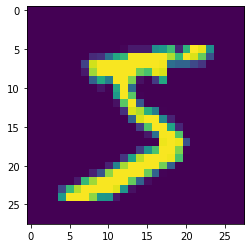

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.imshow(train_data[0])

In [4]:
train_data = train_data.reshape(60000, 784).astype('float32') / 255.
test_data = test_data.reshape(10000, 784).astype('float32') / 255.
import sys
sys.path.append('/home/fyang/code/ml/ml-starter')
from utils.preprocess import shuffle
train_data, train_labels = shuffle(train_data, train_labels)
test_data, test_labels = shuffle(test_data, test_labels)

got classes: [0 1 2 3 4 5 6 7 8 9], ues one to many classifier
iter[0, complete == 10.0%]
iter[1, complete == 20.0%]
iter[2, complete == 30.0%]
iter[3, complete == 40.0%]
iter[4, complete == 50.0%]
iter[5, complete == 60.0%]
iter[6, complete == 70.0%]
iter[7, complete == 80.0%]
iter[8, complete == 90.0%]
iter[9, complete == 100.0%]


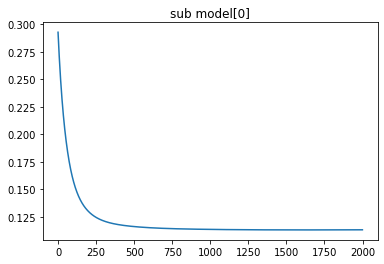

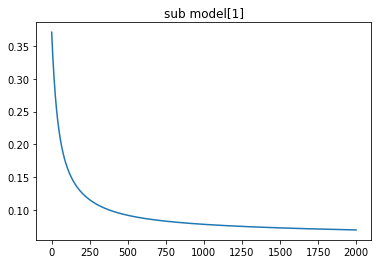

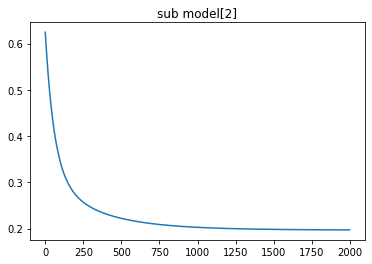

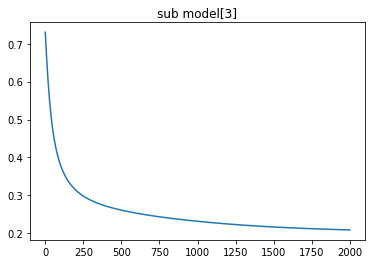

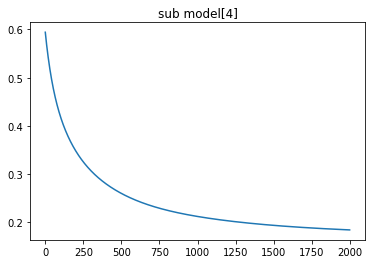

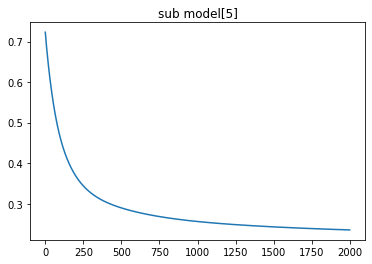

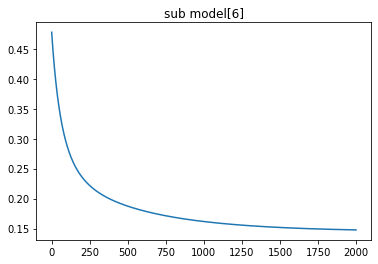

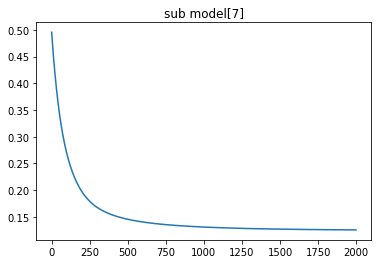

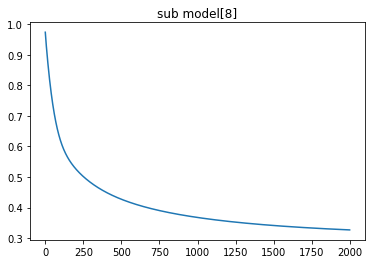

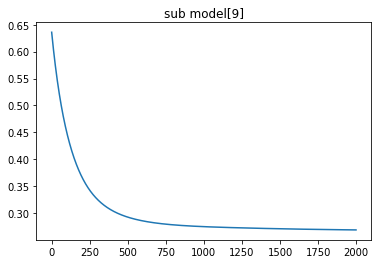

In [5]:
import sys
sys.path.append('/home/fyang/code/ml/ml-starter')

from models.logistic_regression import MultiLogisticClassifier

model = MultiLogisticClassifier(eta=1e-1, epochs=2000, batch_size=800, verbose=False)
model.fit(train_data, train_labels, test_data, test_labels)
# plt.plot(model.losses(0))
for i in range(10):
    # plt.subplot(i + 1)
    plt.plot(model.losses(i))
    plt.title(f'sub model[{i}]')
    plt.show()

In [6]:
(model.predict(test_data).reshape(-1, 1) == test_labels).sum() / len(test_labels)

0.6706

In [7]:
print(model.predict(test_data[:20]).astype('uint8').tolist())
print(test_labels[:20].T.tolist()[0])

[1, 5, 0, 9, 8, 2, 1, 7, 9, 8, 2, 9, 0, 8, 5, 3, 2, 9, 5, 0]
[1, 0, 4, 9, 8, 2, 1, 7, 9, 2, 2, 9, 0, 8, 5, 3, 7, 9, 5, 2]
